In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data=pd.read_csv('<Enter YOur Dataset Path>')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
data.shape

(1000, 5)

In [0]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


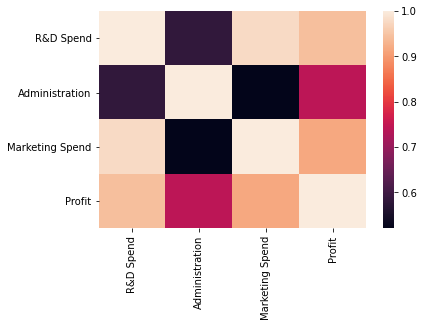

In [0]:
sns.heatmap(data.corr())

In [0]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [0]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [0]:
x=data
x=pd.get_dummies(x)


In [0]:
x.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [0]:
xn=x.drop('Profit',axis=1)
yn=data['Profit']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(xn,yn,test_size=0.3,random_state=10)

In [0]:
LR=LinearRegression()
LR.fit(x_train,y_train)

print("Training Score : ", LR.score(x_train,y_train))
print("Testing Score :" ,LR.score(x_test,y_test))

Training Score :  0.9435886639861945
Testing Score : 0.9649339659468821


In [0]:
y_pred=LR.predict(x_test)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9649339659468821

In [0]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
742,7736.0,111599.5833,83705.6723,0,0,1
676,99265.0,125117.0030,260311.1278,0,0,1
571,158668.0,133889.9086,374929.3785,1,0,0
99,140797.0,131250.6379,340447.2352,1,0,0
78,28731.0,114700.2205,124215.5821,0,1,0


In [0]:
x_train.shape

(700, 6)

In [0]:
import pickle

pickle.dump(LR, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
